### Support Vector Classifier

In [103]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [111]:
# lets create the synthetic data points
from sklearn.datasets import make_classification
X,y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0
)
# change the n_clusters_per_class with different values and check the accuracy score

In [105]:
X

array([[-0.57989276, -1.50054616],
       [-1.90285133,  2.07303613],
       [-0.90314359,  0.95310244],
       ...,
       [-2.29795517,  0.74069915],
       [-0.23899812,  0.48013429],
       [-1.06240995,  1.21378386]])

In [106]:
pd.DataFrame(X)[0]

0     -0.579893
1     -1.902851
2     -0.903144
3     -1.308619
4     -1.336887
         ...   
995   -1.260411
996   -0.492952
997   -2.297955
998   -0.238998
999   -1.062410
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

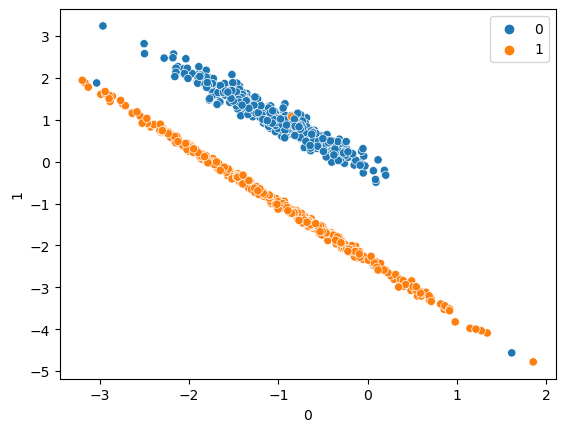

In [107]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

### Linear Kernal

In [109]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.99      0.99      0.99       137

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[112   1]
 [  1 136]]


### RBF kernal

In [114]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.99      0.99      0.99       137

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[112   1]
 [  1 136]]


### Polynomial Kernal

In [115]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.99      0.99      0.99       137

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[112   1]
 [  1 136]]


### Sigmoid Kernal

In [116]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred3 = svc.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.99      0.99      0.99       137

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[112   1]
 [  1 136]]


### Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']
}

In [120]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [121]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [122]:
## prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       113
           1       0.99      0.99      0.99       137

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[111   2]
 [  1 136]]
